In [1]:
# 의사결정나무 => 가장 오래된 딥러닝 방법
# Ananconda Navigator에서 party 설치

library(party)

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


In [2]:
# Sampling

set.seed(1234)
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [3]:
samp <- createDataPartition(iris$Species,p=0.7,list=F)
samp

Resample1
2
3
4
5
6
8
9
12
14
15


In [4]:
# 학습용

data.tr <- iris[samp,]

# 테스트용

data.test <- iris[-samp,]

In [5]:
# 학습시키기

model.ctree <- ctree(Species~.,data=data.tr)

In [6]:
# 문제 및 정답 만들기

x <- subset(data.test,select = -Species)
y <- data.test$Species

In [8]:
# 검증하기

pred <- predict(model.ctree,x)
pred

[1] setosa     setosa     setosa     setosa     setosa     setosa    
 [7] setosa     setosa     setosa     versicolor setosa     setosa    
[13] setosa     setosa     versicolor versicolor versicolor versicolor
[19] versicolor versicolor versicolor versicolor virginica  versicolor
[25] versicolor virginica  versicolor versicolor versicolor versicolor
[31] virginica  virginica  virginica  virginica  virginica  virginica 
[37] versicolor virginica  virginica  virginica  virginica  virginica 
[43] virginica  virginica  virginica 
Levels: setosa versicolor virginica

In [9]:
# 예측력과 오분류표

mean(pred==y)
table(pred,y)

[1] 0.8888889

            y
pred         setosa versicolor virginica
  setosa         13          0         0
  versicolor      2         13         1
  virginica       0          2        14

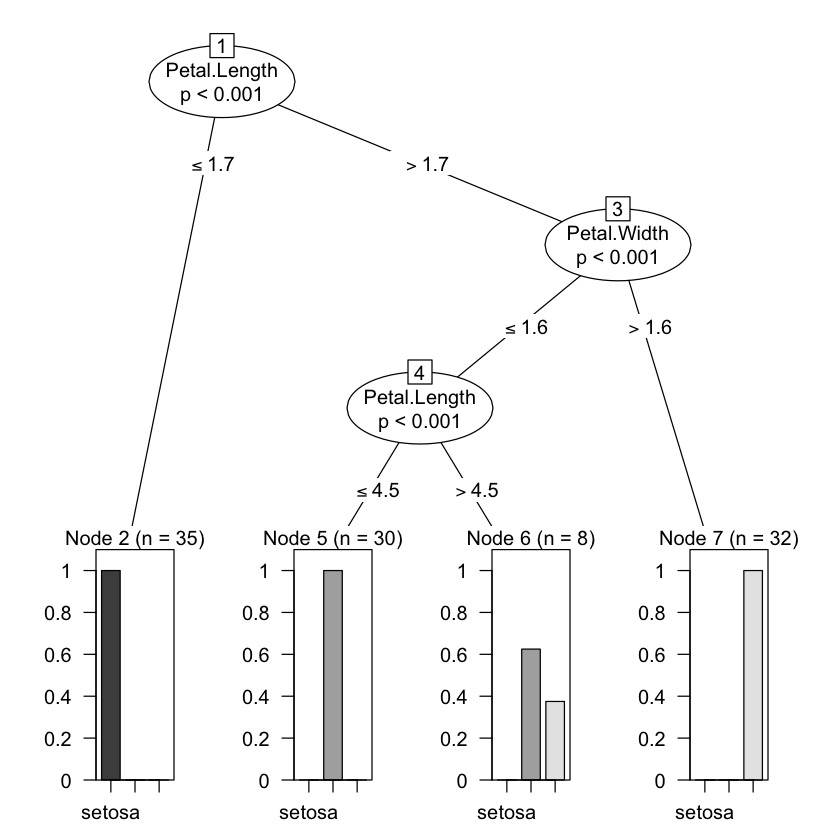

In [11]:
plot(model.ctree)

In [12]:
# 위의 방법은 값은 하나씩 비교하기 때문에 따로 표준화를 할 필요가 없음